### Przetestowana została prosta architektura, w której na przemian występują warstwy konwolucyjne i max poolingu. Dokładność (ang. accurarcy) na zbiorze testowym wynosi 61.1%?

In [1]:
%matplotlib inline
import os

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from utils import (
    get_distribution, 
    get_labels,
    get_number_of_steps,
    get_model1,
    plot_confusion_matrix
)

In [2]:
MAIN_DIRECTORY = 'idenprof'
TRAIN_DIRECTORY = os.path.join(MAIN_DIRECTORY, 'train')
TEST_DIRECTORY = os.path.join(MAIN_DIRECTORY, 'test')
VALID_DIRECTORY = 'valid'

In [3]:
n_train_samples = sum(get_distribution(TRAIN_DIRECTORY).values())
n_valid_samples = sum(get_distribution(TEST_DIRECTORY).values())
print(f'Number of training samples: {n_train_samples}')
print(f'Number of validation samples: {n_valid_samples}')

Number of training samples: 7010
Number of validation samples: 2010


In [4]:
train_data_generator = ImageDataGenerator(rescale=1./255)
valid_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [5]:
BATCH_SIZE = 16
NUMBER_OF_TRAIN_STEPS = get_number_of_steps(n_train_samples, batch_size=BATCH_SIZE)
NUMBER_OF_VALID_STEPS = get_number_of_steps(n_valid_samples, batch_size=BATCH_SIZE)

In [6]:
train_generator = train_data_generator.flow_from_directory(
    directory=TRAIN_DIRECTORY,
    target_size=(150, 150),
    batch_size=BATCH_SIZE, 
)

valid_generator = train_data_generator.flow_from_directory(
    directory=VALID_DIRECTORY,
    target_size=(150, 150),
    batch_size=BATCH_SIZE, 
)

test_generator = train_data_generator.flow_from_directory(
    directory=TEST_DIRECTORY,
    target_size=(150, 150),
    batch_size=BATCH_SIZE,
    shuffle=False,
    class_mode=None
)

Found 7002 images belonging to 10 classes.
Found 1998 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [7]:
model = get_model1(input_size=(150, 150, 3), num_class=10)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0     

In [9]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
model.fit_generator(
    train_generator,
    steps_per_epoch=NUMBER_OF_TRAIN_STEPS,
    epochs=50,
    validation_data=valid_generator,
    validation_steps=NUMBER_OF_VALID_STEPS,
    callbacks=[EarlyStopping()]
)

y_pred_prob = model.predict(test_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 438 steps, validate for 125 steps
Epoch 1/50
438/438 [==============================] - 141s 321ms/step - loss: 1.8069 - accuracy: 0.3579 - val_loss: 1.4143 - val_accuracy: 0.5190
Epoch 2/50
438/438 [==============================] - 152s 347ms/step - loss: 1.3421 - accuracy: 0.5477 - val_loss: 1.2969 - val_accuracy: 0.5776
Epoch 3/50
438/438 [==============================] - 152s 346ms/step - loss: 1.1175 - accuracy: 0.6154 - val_loss: 1.1385 - val_accuracy: 0.6106
Epoch 4/50
438/438 [==============================] - 135s 309ms/step - loss: 0.9066 - accuracy: 0.6989 - val_loss: 1.2213 - val_accuracy: 0.6151


In [11]:
cm = confusion_matrix(y_true=test_generator.classes, y_pred=np.argmax(y_pred_prob, axis=1))

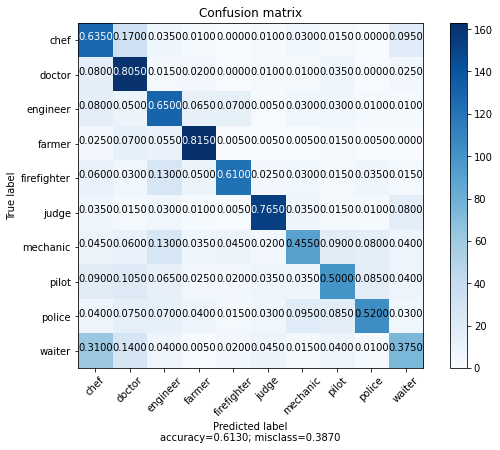

In [12]:
plot_confusion_matrix(cm, target_names=get_labels(train_generator.filenames))